# **Univariate Outlier Detection**

In 1980 Dawkins described an outlier as "Observations which deviate so much from other observations as to arouse suspicion that they were generated by a different mechanism". For me this description is to simple and would lead one to conclude that these observations should be excluded or deleted from our data before we complete our analysis. In fact, my view of an outlier is a data point that seems to standout from the rest of the pack. One should not immediately think this is an erronous data point. It could in fact be a quirk of our data. For example maybe after a certain period of time our data was generated from a system that became unstable. While this is a change in process, it tells us that this can happen. Sometimes outliers represent people or subgroups that do strange or alternative things and could potentially tell us where future fashions or trends are going. Maybe they help us identify what is possible? They can be a data miners gold and should not be excluded when identified. When you do identify an outlier you **should have strong evidence** that the data point is erroneous before you delete or exclude it. The rule I use is a data point cannot be excluded unless their is scientific proof that the value you get is not possible. For example if you were measuring heart rates on people and you found one with 1000bpm then this could be excluded from your analysis,as the fastest recorded heart beat is [600bpm](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3273956/). You will note here that I researched the topic and found a paper that basically supported my evidence. The other thing you may say is the data does not follow normal practice and this maybe the case but you can only exlcude the data point if your study is defined to be on normal or regular subjects. Lets look at another example. Imagine you were predicting house prices and most of them ranged between €150k to €1m, but you found one or two at €40m. This is quite possible and these data points cannot be excluded unless you are going to narrow your models to houses under €1m.

<!--![alt text](https://www.computing.dcu.ie/~amccarren/mcm_images/Outlier_pic1.jpg) -->





Lets look at some data that you can get from sklearn. Its known as the housing housing data and can be imported using the following code.

In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
housing=fetch_california_housing()

#print(housing.keys())
print(housing.DESCR)

x = housing.data
y = housing.target
print(pd.Series(y))
columns = housing.feature_names
#create the dataframe
housing_df = pd.DataFrame(housing.data)
housing_df.columns = columns
housing_df['Y']=pd.Series(y)
#print(housing_df.columns)
housing_df

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


We can look for univariate outliers by using charts such box plot or an individual chart. Examples of both are shown below.

<Axes: xlabel='AveOccup'>

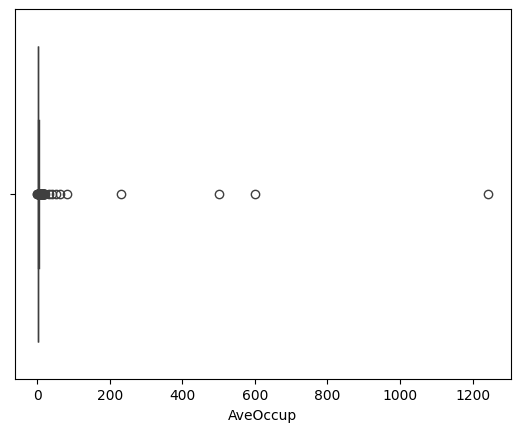

In [2]:
import seaborn as sns
import numpy as np
sns.boxplot(x=housing_df['AveOccup'])

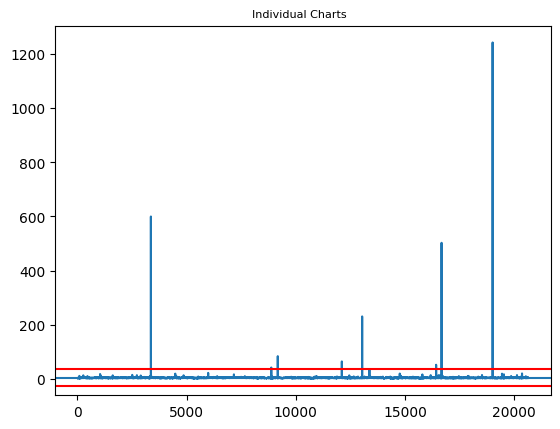

In [3]:
import matplotlib.pyplot as plt
import numpy as np

#x = np.linspace(0, 2*np.pi, 1000)
#y1 = np.sin(x)
x=np.array(housing_df.index.tolist())
y1=np.array(housing_df['AveOccup'])
f = plt.figure()

ax = f.add_subplot(111)

plt.plot(x, y1)
plt.axhline(y=housing_df['AveOccup'].mean())
plt.axhline(y=housing_df['AveOccup'].mean()+3*housing_df['AveOccup'].std(),color='r')
plt.axhline(y=housing_df['AveOccup'].mean()-3*housing_df['AveOccup'].std(),color='r')

plt.title('Individual Charts  ', fontsize=8)




plt.show()

It can often be confusing when attempting to decide how to deal with outliers and there is often as I said before a compulsion to remove them as they don't necessarily fit our orginal hypothesis.

We have examined the weighted distance variable and we can see at least one outlier. Remember, do not remove outliers unless you have evidence to do so. Repeat this for the remaining variables.  What results do you find?

